# Lab 11: Runge-Kutta Method (Order Four)/Adams Fourth-Order Predictor-Corrector

### Consider the initial value problem

$$
y' = \frac{\sin(2t) - 2ty}{t^2}, \quad y(1) = 2, \quad t \in [1, 2].
$$

The actual solution is 

$$
y(t) = \frac{4 + \cos 2 - \cos(2t)}{2t^2}
$$

(a) Use Euler’s method to find the approximation values of the solution $y(t)$ with $N = 10$ and write down approximations (10 digits after the decimal point) of $y(t_i)$ for $i = 0, 1, \ldots, 10$.

(b) Use the Runge-Kutta method of order four to find the approximation values of the solution $y(t)$ with $N = 10$ and write down approximations (10 digits after the decimal point) of $y(t_i)$ for $i = 0, 1, \ldots, 10$.

(c) Plot the absolute errors from (a) and (b) vs. time steps $t_i, i = 1, 2, \ldots, 10$ on the same figure in log-scale (use `plt.yscale('log')`). Label the curves and save the plot as `lab11ex2.png` and attach it to your assignment. Which method is more accurate? Why?

(d) Use the Runge-Kutta method of order four to find the approximation values of the solution $y(t)$ with $N = 10, 20, 40, 80$. Let the absolute errors at the end point $t = 2$ be $e_{10}, e_{20}, e_{40}, e_{80}$. Calculate $e_{10}/e_{20}, e_{20}/e_{40}, e_{40}/e_{80}$. What do you estimate to be the order of error of the approximations using this method? Is it consistent with the theory?


In [2]:
# a
# use euler's method to find the approximation values
import numpy as np
from NumericalMethodsCode.euler import euler

f = lambda t,y: (np.sin(2*t) - 2*t*y) / t**2
t_euler, w_euler = euler(f, 1, 2, 2, 10)
np.set_printoptions(precision=10)
print(f'[t_euler,w_euler] = \n{np.stack((t_euler,w_euler),axis=1)}')

[t_euler,w_euler] = 
[[1.           2.          ]
 [1.1          1.6909297427]
 [1.2          1.4503058559]
 [1.3          1.2554953786]
 [1.4          1.0928452832]
 [1.5          0.9538157606]
 [1.6          0.8329123262]
 [1.7          0.7265180454]
 [1.8          0.6322030815]
 [1.9          0.5483002563]
 [2.           0.4736354678]]


In [3]:
# b
from NumericalMethodsCode.RungeKutta4 import RungeKutta4

# use runge-kutta method of order four to find the approximation values
t_rk,w_rk = RungeKutta4(f,1,2,2,10)
np.set_printoptions(precision=10)
print(f'[t_rk,w_rk] = \n{np.stack((t_rk,w_rk),axis=1)}')

[t_rk,w_rk] = 
[[1.           2.          ]
 [1.1          1.7241157301]
 [1.2          1.5004362222]
 [1.3          1.3138324786]
 [1.4          1.1546145498]
 [1.5          1.0164134194]
 [1.6          0.8949538182]
 [1.7          0.7873127396]
 [1.8          0.6914549962]
 [1.9          0.6059332514]
 [2.           0.529689288 ]]


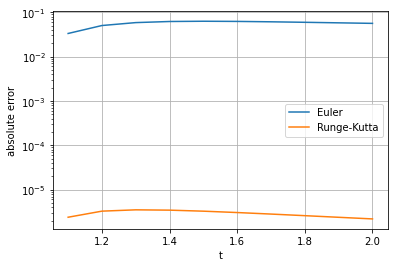

In [7]:
# c
# plot the absolute errors from (a) and (b) vs time steps t_i, i = 1,2,...,10
yt = lambda t: (4 + np.cos(2) - np.cos(2*t)) / (2*t**2)
y_exact = [yt(t) for t in t_euler]

abs_err10_euler = np.array(abs(y_exact - w_euler))

abs_err10_rk = np.array(abs(y_exact - w_rk))

# plotting absolute errors
import matplotlib.pyplot as plt
plt.plot(t_euler[1:], abs_err10_euler[1:], label='Euler')
plt.plot(t_rk[1:], abs_err10_rk[1:], label='Runge-Kutta')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend()
plt.grid()
plt.show()

Runge-Kutta is more accurate as shown by its lower absolute error. RK4 is 4th order, while Euler's method is 1st order.

In [8]:
# part d
# use runge-kutta of order 4 to find the approximations with N=10,20,40,80
# let the absolute errors at the end point t=2 be e_10, e_20, e_40, e_80

# N = 10
t_rk_N10,w_rk_N10 = RungeKutta4(f,1,2,2,10)
np.set_printoptions(precision=10)
print(f'[t_rk_N10,w_rk_N10] = \n{np.stack((t_rk_N10, w_rk_N10),axis=1)}')

e_10 = abs(w_rk_N10[-1] - y_exact[-1])
print('e_10:',e_10)

[t_rk_N10,w_rk_N10] = 
[[1.           2.          ]
 [1.1          1.7241157301]
 [1.2          1.5004362222]
 [1.3          1.3138324786]
 [1.4          1.1546145498]
 [1.5          1.0164134194]
 [1.6          0.8949538182]
 [1.7          0.7873127396]
 [1.8          0.6914549962]
 [1.9          0.6059332514]
 [2.           0.529689288 ]]
e_10: 2.190004806390533e-06


The error is estimated to be of order 4, which is conistent with the theory.

### Water flows from an inverted conical tank with circular orifice at the rate

$$
\frac{dx}{dt} = -0.6 \pi r^2 \sqrt{2g} \frac{\sqrt{x}}{A(x)}
$$

where $r$ is the radius of the orifice, $x$ is the height of the liquid level from the vertex of the cone, and $A(x)$ is the area of the cross section of the tank $x$ units above the vertex. Suppose $r = 0.1$ ft, $g = 32.1 \text{ ft/s}^2$, and the tank has an initial water level of 8 ft from the vortex and initial volume of $(512\pi/3) \text{ ft}^3$. Use your `Adams4PredictCorrect` function to do the following problems. Notice that the volume of a cone is $\frac{1}{3} \pi R^2 h$ when $R$ is the radius at the top of the cone and $h$ is the height of the cone.

(a) Find an explicit formula of $A(x)$. Please show your work.

(b) With $h = 5$ seconds, find the water heights after 5, 10, 15, and 20 minutes. Plot the water level from 0 to 20 minutes. Save your figure as `lab11ex4.png` and attach it to your assignment.

(c) Determine, to within 1 minute, when the tank will be empty. Please give your reasoning.


a)
$$ A(x) = \pi x^2 $$

???

In [12]:
# b
from NumericalMethodsCode.Adams4PredictCorrect import Adams4PredictCorrect
r = 0.1
g = 32.1
h = 5
N = int(60 *20 / h)
f = lambda t, x: -0.6 * np.pi * (r**2) * np.sqrt(2*g) *(np.sqrt(x)/(np.pi*x**2))

t_a4, w_a4 = Adams4PredictCorrect(f, 0, 20, 8, 4)
print(f'[t_a4, w_a4] = \n{np.stack((t_a4,w_a4),axis=1)}')

# FIX THIS! NOT CORRECT!!

[t_a4, w_a4] = 
[[ 0.            8.          ]
 [ 5.            7.9893662398]
 [10.            7.9787112069]
 [15.            7.9680347876]
 [20.            7.9573368669]]


Text(0, 0.5, 'water heights')

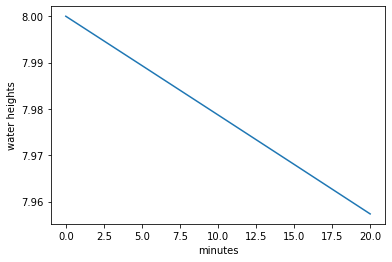

In [13]:
plt.plot(t_a4, w_a4)
plt.xlabel('minutes')
plt.ylabel('water heights')

c)

It should take between 25 to 26 minutes for the tank to empty....